### I created a scraping script using libraries requests and beautifulSoup. Also I created empty lists and wrote down all the information there. When we go to the csv file, we will see 10 columns  and 600 lines in it. It contains following information about each car: Car, Price, Year, Region, Body, Engine_volume, Mileage, Transmission, Steering_wheel, Color. 

In [11]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd 


car = []
price = []
year_of_manufacture = []
region = []
body = []
engine_volume = []
mileage = []
transmission = []
steering_wheel = []
color = []

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'} 
for i in range(30):
    results = requests.get(f'https://kolesa.kz/cars/avtomobili-s-probegom/?auto-car-order=1&auto-car-volume[from]=1&auto-car-volume[to]=9&page={i}')
    soup = BeautifulSoup(results.text, 'html.parser')
    for j in soup.find_all('span',class_='a-el-info-title'):
        car.append(j.text.strip())
        results2 = requests.get('https://kolesa.kz'+ j.find('a',class_='list-link ddl_product_link')['href'])
        soup2 = BeautifulSoup(results2.text, 'html.parser')
        
        p = re.sub("[^0-9]", "", soup2.find('div', class_='offer__price').text.replace(u'\xa0', ' '))
        price.append(int(p))
        
        year_of_manufacture.append(int(soup2.find('span', class_='year').text.strip()))
        region.append(soup2.find_all('dd',class_='value')[0].text.strip())
        body.append(soup2.find_all('dd',class_='value')[1].text.strip())
        
        engine_volume.append(re.compile(r'[^\d.]+').sub('', (soup2.find_all('dd', class_='value')[2].text)))
        
        m = soup2.find_all('dd',class_='value')[3].text.strip()
        if m[-1] == 'м':
            m2 = re.sub("[^0-9]", "", m)
            mileage.append(int(m2))
            transmission.append(soup2.find_all('dd',class_='value')[4].text.strip())
            steering_wheel.append(soup2.find_all('dd',class_='value')[5].text.strip())
            color.append(soup2.find_all('dd',class_='value')[6].text.strip())
        else:
            mileage.append(0)
            transmission.append(soup2.find_all('dd',class_='value')[3].text.strip())
            steering_wheel.append(soup2.find_all('dd',class_='value')[4].text.strip())
            color.append(soup2.find_all('dd',class_='value')[5].text.strip())
        
myDict = {}

myDict['Car'] = car
myDict['Price'] = price
myDict['Year'] = year_of_manufacture
myDict['Region'] = region
myDict['Body'] = body
myDict['Engine_volume'] = engine_volume
myDict['Mileage'] = mileage
myDict['Transmission'] = transmission
myDict['Steering_wheel'] = steering_wheel
myDict['Color'] = color

df = pd.DataFrame.from_dict(myDict)
df.to_excel('kolesa2.xlsx', encoding='utf-8-sig')
df.to_csv('kolesa.csv', encoding='utf-8-sig')

df

,Car,Price,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
0,Chevrolet Tracker,5850000,2015,Петропавловск,кроссовер,1.8,46000,автомат,слева,красный металлик
1,Opel Frontera,1650000,1994,Талдыкорган,внедорожник,2.3,0,механика,слева,синий металлик
2,Renault Sandero Stepway,3990000,2014,Караганда,хэтчбек,1.6,110000,автомат,слева,коричневый металлик
3,Toyota Land Cruiser,16800000,2010,Алматы,внедорожник,4,220000,автомат,слева,белый
4,Mitsubishi Pajero,8000000,2007,Алматы,внедорожник,3,137000,автомат,слева,черный
...,...,...,...,...,...,...,...,...,...,...
595,Daewoo Nexia,950000,2007,Актобе,седан,1.5,190000,механика,слева,голубой
596,ГАЗ ГАЗель,6400000,2015,Шымкент,фургон,2.9,0,механика,слева,коричневый
597,BMW X5,7000000,2006,Нур-Султан (Астана),кроссовер,4.8,220000,автомат,слева,синий
598,Volkswagen Transporter,1600000,1991,Кызылорда,минивэн,2,222222,механика,слева,передний привод


### Return DataFrame with duplicate rows removed and remove null properties.

In [52]:
df = pd.read_csv('kolesa.csv')
df = df.drop('Unnamed: 0', axis='columns')
df= df.dropna()
df= df.drop_duplicates()
df.head()

,Car,Price,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
0,Chevrolet Tracker,5850000,2015,Петропавловск,кроссовер,1.8,46000,автомат,слева,красный металлик
1,Opel Frontera,1650000,1994,Талдыкорган,внедорожник,2.3,0,механика,слева,синий металлик
2,Renault Sandero Stepway,3990000,2014,Караганда,хэтчбек,1.6,110000,автомат,слева,коричневый металлик
3,Toyota Land Cruiser,16800000,2010,Алматы,внедорожник,4.0,220000,автомат,слева,белый
4,Mitsubishi Pajero,8000000,2007,Алматы,внедорожник,3.0,137000,автомат,слева,черный


In [53]:
df.sort_values(by=['Price'])

,Car,Price,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
192,ВАЗ (Lada) 2107,350000,2006,Атырау,седан,1.5,0,механика,слева,белый
79,ВАЗ (Lada) 2114 (хэтчбек),380000,2003,Караганда,хэтчбек,1.6,280000,механика,слева,серебристый
238,ВАЗ (Lada) 2107,400000,2008,Уральск,седан,1.7,0,механика,слева,белый
564,ЗАЗ 968,500000,1989,Актобе,седан,1.2,80000,механика,слева,зеленый
118,Opel Omega,550000,1987,Алматы,седан,2.0,0,механика,слева,синий
...,...,...,...,...,...,...,...,...,...,...
412,Toyota Land Cruiser,31600000,2017,Нур-Султан (Астана),внедорожник,4.6,53000,автомат,слева,черный
257,Lexus RX 350,33500000,2019,Алматы,кроссовер,3.5,9000,автомат,слева,черный
228,Toyota Land Cruiser Prado,36200000,2021,Алматы,внедорожник,4.0,0,автомат,слева,белый
55,BMW X5,44300000,2019,Алматы,кроссовер,3.0,40,автомат,слева,полный привод


In [54]:
df.groupby(['Year']).first()

,Car,Price,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
Year,,,,,,,,,
1987,Opel Omega,550000,Алматы,седан,2.0,0,механика,слева,синий
1989,Mazda 626,1450000,Алматы,лифтбек,2.0,310915,механика,слева,красный
1990,Mazda 626,850000,Алматы,универсал,2.0,0,механика,слева,Да
1991,Opel Vectra,950000,Шымкент,седан,2.0,145000,механика,слева,синий
1992,Toyota Land Cruiser Prado,6800000,Талдыкорган,внедорожник,4.0,100000,автомат,справа,серый металлик
1993,Volkswagen Passat,1550000,Талдыкорган,универсал,1.8,250000,механика,слева,синий металлик
1994,Opel Frontera,1650000,Талдыкорган,внедорожник,2.3,0,механика,слева,синий металлик
1995,Mitsubishi RVR,1600000,Алматы,минивэн,2.0,444444,автомат,справа,полный привод
1996,Toyota Caldina,2250000,Усть-Каменогорск,универсал,1.8,0,автомат,справа,серебристый


In [55]:
df.groupby(['Year']).get_group(2008)

,Car,Price,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
7,Mitsubishi Pajero,7500000,2008,Актобе,внедорожник,3.0,219000,автомат,слева,серебристый металлик
14,Toyota Highlander,8800000,2008,Алматы,кроссовер,3.5,210000,автомат,слева,серый металлик
41,Chrysler 300C,5500000,2008,Алматы,седан,2.7,205000,автомат,слева,белый
78,ГАЗ ГАЗель,3199000,2008,Костанай,пикап,2.9,395700,механика,слева,золотистый
151,ВАЗ (Lada) 2114 (хэтчбек),1000000,2008,Актобе,хэтчбек,1.6,0,механика,слева,передний привод
182,Toyota Camry,4000000,2008,Аксай,седан,3.5,0,автомат,слева,черный
185,Toyota Camry,4000000,2008,Уральск,седан,3.5,0,автомат,слева,черный металлик
206,ВАЗ (Lada) 2113 (хэтчбек),550000,2008,Атырау,хэтчбек,1.5,320,механика,слева,серебристый
217,Hyundai Accent,2100000,2008,Актобе,седан,1.6,180000,автомат,слева,черный металлик
222,BMW X6,7500000,2008,Алматы,кроссовер,3.0,139000,автомат,слева,белый


In [57]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Data preprocessing. Decision trees. We encode categorical features using an ordinal encoding scheme. Encode categorical features as a one-hot numeric array. LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [58]:
data = df.drop('Price',axis='columns')
target = df['Price']
car_n = LabelEncoder()
body_n = LabelEncoder()
tr_n = LabelEncoder()
data['Car_2'] = car_n.fit_transform(data['Car'])
data['Body_2'] = body_n.fit_transform(data['Body'])
data['Transmission_2'] = tr_n.fit_transform(data['Transmission'])
data

,Car,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color,Car_2,Body_2,Transmission_2
0,Chevrolet Tracker,2015,Петропавловск,кроссовер,1.8,46000,автомат,слева,красный металлик,23,2,0
1,Opel Frontera,1994,Талдыкорган,внедорожник,2.3,0,механика,слева,синий металлик,123,0,2
2,Renault Sandero Stepway,2014,Караганда,хэтчбек,1.6,110000,автомат,слева,коричневый металлик,134,12,0
3,Toyota Land Cruiser,2010,Алматы,внедорожник,4.0,220000,автомат,слева,белый,156,0,0
4,Mitsubishi Pajero,2007,Алматы,внедорожник,3.0,137000,автомат,слева,черный,109,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Daewoo Nexia,2007,Актобе,седан,1.5,190000,механика,слева,голубой,30,8,2
596,ГАЗ ГАЗель,2015,Шымкент,фургон,2.9,0,механика,слева,коричневый,192,11,2
597,BMW X5,2006,Нур-Султан (Астана),кроссовер,4.8,220000,автомат,слева,синий,12,2,0
598,Volkswagen Transporter,1991,Кызылорда,минивэн,2.0,222222,механика,слева,передний привод,174,6,2


In [59]:
len(df.Car.unique())

197

In [60]:
data = data[['Year','Engine_volume', 'Body_2']]

In [61]:
X, y = data, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6259556263293345

In [62]:
X_test

,Year,Engine_volume,Body_2
144,2005,2.4,8
62,2018,2.0,2
354,2019,5.6,0
248,2009,4.7,0
505,2005,1.6,12
...,...,...,...
536,1989,2.3,8
179,2007,1.6,12
416,2017,2.0,2
485,1999,4.0,0


In [63]:
clf.predict(X_test)[:3]

array([ 4172022.42105854, 11208486.00488257, 19079302.39893699])

In [64]:
y_test[:3]

144     4600000
62     11350000
354    29000000
Name: Price, dtype: int64

In [65]:
model = DecisionTreeClassifier()
model.fit(data, target)
model.score(data,target)

0.7156673114119922

In [66]:
df.tail()

,Car,Price,Year,Region,Body,Engine_volume,Mileage,Transmission,Steering_wheel,Color
595,Daewoo Nexia,950000,2007,Актобе,седан,1.5,190000,механика,слева,голубой
596,ГАЗ ГАЗель,6400000,2015,Шымкент,фургон,2.9,0,механика,слева,коричневый
597,BMW X5,7000000,2006,Нур-Султан (Астана),кроссовер,4.8,220000,автомат,слева,синий
598,Volkswagen Transporter,1600000,1991,Кызылорда,минивэн,2.0,222222,механика,слева,передний привод
599,Mercedes-Benz E 230,1800000,1992,Нур-Султан (Астана),универсал,2.3,222,механика,слева,бордовый


In [67]:
model.predict([[2007,1.5,8]])

array([950000], dtype=int64)

### Cross-validation process and selection of best model and best hyperparameters

In [68]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=3)
grid_svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
clf_svc = grid_svc.best_estimator_
print(clf_svc)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [71]:
param_grid = [{'n_neighbors':[2,3,4,5,6]}]
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=3)
grid_knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
clf_knn = grid_knn.best_estimator_
print(clf_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
for model in [clf_knn, clf_svc, decision_tree]:
    y_pred = model.predict(X_test)
    score = precision_score(y_test.to_numpy().T, y_pred, average='weighted')
    print(model, 'score:', score)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') score: 0.03177814478392513
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score: 0.001707238866116075
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') score: 0.024116891457931923


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


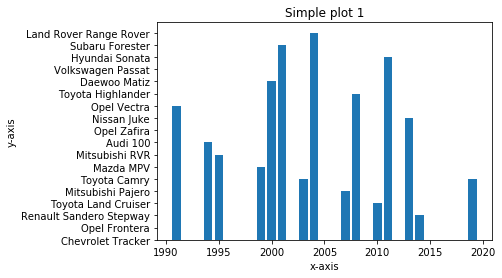

In [74]:
df = pd.read_csv('kolesa.csv')
df = df[:40]
x = df['Year']
y = df['Car']
plt.bar(x, y)

plt.title("Simple plot 1")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
  
plt.show()

In [75]:
df = df.groupby(['Engine_volume']).first()
df

,Unnamed: 0,Car,Price,Year,Region,Body,Mileage,Transmission,Steering_wheel,Color
Engine_volume,,,,,,,,,,
1.6,2,Renault Sandero Stepway,3990000,2014,Караганда,хэтчбек,110000,автомат,слева,коричневый металлик
1.8,0,Chevrolet Tracker,5850000,2015,Петропавловск,кроссовер,46000,автомат,слева,красный металлик
2.0,8,Mitsubishi RVR,1600000,1995,Алматы,минивэн,444444,автомат,справа,полный привод
2.2,10,Opel Zafira,2300000,2001,Актобе,минивэн,160000,автомат,слева,серебристый
2.3,1,Opel Frontera,1650000,1994,Талдыкорган,внедорожник,0,механика,слева,синий металлик
2.4,5,Toyota Camry,3800000,2003,Алматы,седан,0,автомат,слева,белый
2.5,6,Mazda MPV,3000000,1999,Талдыкорган,минивэн,0,автомат,справа,зеленый
2.8,9,Audi 100,2500000,1994,Караганда,универсал,300000,автомат,слева,передний привод
3.0,4,Mitsubishi Pajero,8000000,2007,Алматы,внедорожник,137000,автомат,слева,черный


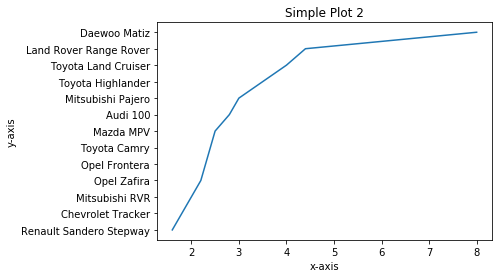

In [76]:
x = df['Car']
y = df.index
plt.plot(y,x)
plt.title("Simple Plot 2")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
  
plt.show()

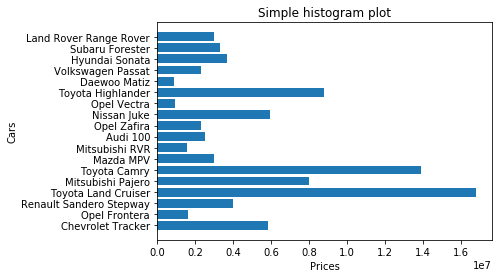

In [77]:
df = pd.read_csv('kolesa.csv')
df = df[:20]
plt.barh(df['Car'], df['Price'])
plt.title("Simple histogram plot")
plt.xlabel('Prices')
plt.ylabel('Cars')
plt.show()

In [78]:
df = pd.read_csv('kolesa.csv')
df = df.groupby(['Body']).first()
df[2:13]

,Unnamed: 0,Car,Price,Year,Region,Engine_volume,Mileage,Transmission,Steering_wheel,Color
Body,,,,,,,,,,
внедорожник,1,Opel Frontera,1650000,1994,Талдыкорган,2.3,0,механика,слева,синий металлик
кабриолет,244,BMW 650,10000000,2007,Алматы,4.8,137000,автомат,слева,фиолетовый
кроссовер,0,Chevrolet Tracker,5850000,2015,Петропавловск,1.8,46000,автомат,слева,красный металлик
купе,250,Hyundai Tuscani,3100000,2008,Алматы,2.0,117000,механика,слева,белый
лифтбек,176,Toyota Carina E,1900000,1992,Алматы,2.0,0,механика,слева,голубой
микроавтобус,86,Volkswagen Transporter,1800000,1997,Караганда,1.6,0,механика,слева,синий
минивэн,6,Mazda MPV,3000000,1999,Талдыкорган,2.5,0,автомат,справа,зеленый
пикап,51,Toyota Tundra,23000000,2017,Тараз,4.6,0,автомат,слева,серебристый
седан,5,Toyota Camry,3800000,2003,Алматы,2.4,0,автомат,слева,белый


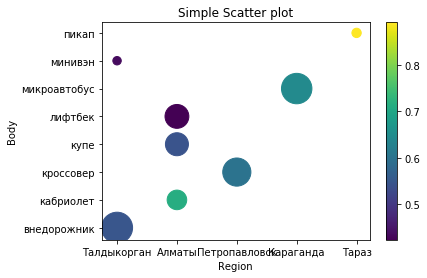

In [25]:
import numpy as np
x = df.index[2:13]
y = df['Region'][2:13]

plt.ylabel("Body")
plt.xlabel("Region")
plt.title("Simple Scatter plot")
rng = np.random.RandomState(0)
x = df.index[2:10]
y = df['Region'][2:10]
colors = rng.rand(8)
sizes = 1000 * rng.rand(8)
plt.scatter(y, x, c=colors, s=sizes)
plt.colorbar()